<a href="https://colab.research.google.com/github/hawooh/Amazon-reviews-customer-feedback/blob/main/Amazon_reviews_customer_feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/amazon-reviews")

print("Path to dataset files:", path)

100%|██████████| 44.3M/44.3M [00:00<00:00, 86.9MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abdallahwagih/amazon-reviews/versions/1


In [2]:
# Install libraries
!pip install spacy textblob wordcloud
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import os

# List files in the directory
file_path = "/root/.cache/kagglehub/datasets/abdallahwagih/amazon-reviews/versions/1"
print("Files in directory:", os.listdir(file_path))



Files in directory: ['Cell_Phones_and_Accessories_5.json']


In [4]:
json_file = os.path.join(file_path, "Cell_Phones_and_Accessories_5.json")  # Replace "data.json" with the actual file name



In [5]:
import pandas as pd

# Load the JSON file into a DataFrame
data = pd.read_json(json_file, lines=True)

# Display the first few rows
print(data.head())


       reviewerID        asin      reviewerName helpful  \
0  A30TL5EWN6DFXT  120401325X         christina  [0, 0]   
1   ASY55RVNIL0UD  120401325X          emily l.  [0, 0]   
2  A2TMXE2AFO7ONB  120401325X             Erica  [0, 0]   
3   AWJ0WZQYMYFQ4  120401325X                JM  [4, 4]   
4   ATX7CZYFXI1KW  120401325X  patrice m rogoza  [2, 3]   

                                          reviewText  overall  \
0  They look good and stick good! I just don't li...        4   
1  These stickers work like the review says they ...        5   
2  These are awesome and make my phone look so st...        5   
3  Item arrived in great time and was in perfect ...        4   
4  awesome! stays on, and looks great. can be use...        5   

                                     summary  unixReviewTime   reviewTime  
0                                 Looks Good      1400630400  05 21, 2014  
1                      Really great product.      1389657600  01 14, 2014  
2                         

In [6]:
# Check for missing values
print(data.isnull().sum())




reviewerID           0
asin                 0
reviewerName      3519
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64


In [7]:
# Drop rows with missing 'reviewText' or 'overall'
data = data.dropna(subset=['reviewText', 'overall'])



In [8]:
# Optionally, fill missing values in non-critical columns like 'reviewerName'
data['reviewerName'] = data['reviewerName'].fillna('Unknown')

In [9]:
# Convert unixReviewTime to a readable datetime format
data['reviewTime'] = pd.to_datetime(data['unixReviewTime'], unit='s')

# Display the updated DataFrame with the converted 'reviewTime'
print(data[['unixReviewTime', 'reviewTime']].head())


   unixReviewTime reviewTime
0      1400630400 2014-05-21
1      1389657600 2014-01-14
2      1403740800 2014-06-26
3      1382313600 2013-10-21
4      1359849600 2013-02-03


In [10]:
data.info


<bound method DataFrame.info of             reviewerID        asin       reviewerName helpful  \
0       A30TL5EWN6DFXT  120401325X          christina  [0, 0]   
1        ASY55RVNIL0UD  120401325X           emily l.  [0, 0]   
2       A2TMXE2AFO7ONB  120401325X              Erica  [0, 0]   
3        AWJ0WZQYMYFQ4  120401325X                 JM  [4, 4]   
4        ATX7CZYFXI1KW  120401325X   patrice m rogoza  [2, 3]   
...                ...         ...                ...     ...   
194434  A1YMNTFLNDYQ1F  B00LORXVUE    eyeused2loveher  [0, 0]   
194435  A15TX8B2L8B20S  B00LORXVUE       Jon Davidson  [0, 0]   
194436  A3JI7QRZO1QG8X  B00LORXVUE  Joyce M. Davidson  [0, 0]   
194437  A1NHB2VC68YQNM  B00LORXVUE     Nurse Farrugia  [0, 0]   
194438  A1AG6U022WHXBF  B00LORXVUE     Trisha Crocker  [0, 0]   

                                               reviewText  overall  \
0       They look good and stick good! I just don't li...        4   
1       These stickers work like the review says they ...        5   
2       These are awesome and make my phone look so st...        5   
3       Item arrived in great time and was in perfect ...        4   
4       awesome! stays on, and looks great. can be use...        5   
...                                                   ...      ...   
194434  Works great just like my original one. I reall...        5   
194435  Great product. Great packaging. High quality a...        5   
194436  This is a great cable, just as good as the mor...        5   
194437  I really like it becasue it works well with my...        5   
194438  product as described, I have wasted a lot of m...        5   

                                                  summary  unixReviewTime  \
0                                              Looks Good      1400630400   
1                                   Really great product.      1389657600   
2                                          LOVE LOVE LOVE      1403740800   
3                                                   Cute!      1382313600   
4               leopard home button sticker for iphone 4s      1359849600   
...                                                   ...             ...   
194434                           This works just perfect!      1405900800   
194435           Great replacement cable. Apple certified      1405900800   
194436                                       Real quality      1405900800   
194437  I really like it becasue it works well with my...      1405814400   
194438              I have wasted a lot of money on cords      1405900800   

       reviewTime  
0      2014-05-21  
1      2014-01-14  
2      2014-06-26  
3      2013-10-21  
4      2013-02-03  
...           ...  
194434 2014-07-21  
194435 2014-07-21  
194436 2014-07-21  
194437 2014-07-20  
194438 2014-07-21  

[194439 rows x 9 columns]>

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Preprocessing function using spaCy
def preprocess_text_spacy(text):
    # Process the text with spaCy
    doc = nlp(text.lower())  # Convert text to lowercase and process with spaCy

    # Tokenization, stopword removal, and lemmatization
    tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and token.text not in string.punctuation]

    # Return the cleaned and lemmatized text
    return " ".join(tokens)

# Apply preprocessing to the 'reviewText' column
data['cleaned_review_spacy'] = data['reviewText'].apply(preprocess_text_spacy)

# Display the original and cleaned reviews
print(data[['reviewText', 'cleaned_review_spacy']].head())


#### Step 5: Sentiment Analysis
Perform sentiment analysis using TextBlob.

In [14]:
from textblob import TextBlob

# Function to determine sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['sentiment'] = data['cleaned_review_spacy'].apply(get_sentiment)

# Display results
print(data[['cleaned_review_spacy', 'sentiment']].head())


                                cleaned_review_spacy sentiment
0  look good stick good like rounded shape bump s...  Positive
1  sticker work like review say stick great stay ...  Positive
2  awesome phone look stylish far year believe ye...  Positive
3  item arrive great time perfect condition order...  Positive
4  awesome stay look great multiple apple product...  Positive


#### Step 6: Visualizing Sentiment Distribution
  Visualize the distribution of sentiments.

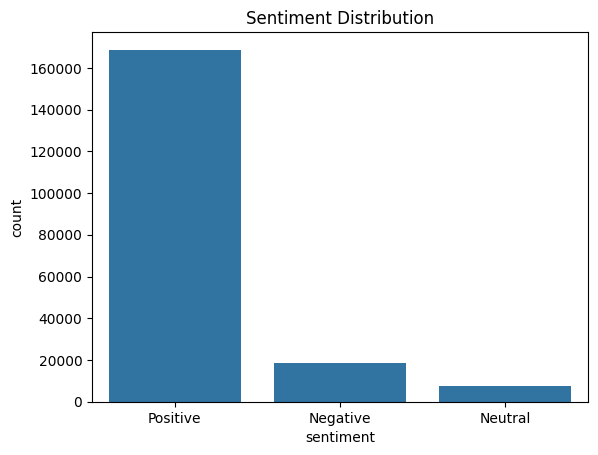

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.countplot(data=data, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()


#### Step 7: Feature Engineering (TF-IDF)
  Convert the text into numerical features using TF-IDF.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)

# Fit and transform the cleaned reviews
X_tfidf = tfidf.fit_transform(data['cleaned_review_spacy'])

# Map sentiment labels to numeric values
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
data['sentiment_label'] = data['sentiment'].map(sentiment_mapping)

print("TF-IDF Matrix shape:", X_tfidf.shape)


TF-IDF Matrix shape: (194439, 1000)


#### Step 8: Model Training
Train a Random Forest classifier to predict sentiment.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentiment_label'], test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Display classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.87      0.39      0.54      3595
           0       0.79      0.76      0.77      1471
           1       0.93      0.99      0.96     33822

    accuracy                           0.93     38888
   macro avg       0.86      0.71      0.76     38888
weighted avg       0.92      0.93      0.92     38888



#### Step 9: Word Cloud Visualization
  Generate word clouds for Positive, Negative, and Neutral reviews.

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for Positive reviews
positive_reviews = " ".join(data[data['sentiment'] == 'Positive']['cleaned_review_spacy'])
wordcloud = WordCloud(background_color="white").generate(positive_reviews)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()
